# Energy Consumption Dataset - Linear Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv(r"C:\my files\train_energy_data.csv")
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [7]:
df.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [35]:
day_en = LabelEncoder()
df["day_encoder"]=day_en.fit_transform(df["Day of Week"])
buil_en = LabelEncoder()
df["buil_encoder"]=buil_en.fit_transform(df["Building Type"])
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption,day_encoder,buil_encoder
0,Residential,7063,76,10,29.84,Weekday,2713.95,0,2
1,Commercial,44372,66,45,16.72,Weekday,5744.99,0,0
2,Industrial,19255,37,17,14.30,Weekend,4101.24,1,1
3,Residential,13265,14,41,32.82,Weekday,3009.14,0,2
4,Commercial,13375,26,18,11.92,Weekday,3279.17,0,0


In [50]:
x = df[["buil_encoder","Square Footage","Number of Occupants","Appliances Used","day_encoder","Average Temperature"]]
y = df["Energy Consumption"]

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =42)

In [52]:
eng_model = LinearRegression()
eng_model.fit(x_train,y_train)

LinearRegression()

In [54]:
bu = input("enter the building type: ")
sf = int(input("Enter the square footage: "))
occup = int(input("Enter the number of occupants: "))
app = int(input("Enter the number of appliances used: "))
day_enc = input("Enter the day of week: ")
avgt = float(input("enter the temp: "))


enter the building type:  Commercial
Enter the square footage:  1234
Enter the number of occupants:  10
Enter the number of appliances used:  5
Enter the day of week:  Weekday
enter the temp:  14.32


In [57]:
day_en1 = day_en.transform([day_enc])[0]
buil_en1 = buil_en.transform([bu])[0]
print(day_en1,buil_en1)

0 0


In [59]:
result = eng_model.predict([[buil_en1,sf,occup,app,day_en1,avgt]])
print("The predicated energy consumption is: ",result[0])

The predicated energy consumption is:  2427.853237953262


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [61]:
model_predictions =eng_model.predict(x_test)

In [62]:
len(y_test)

200

In [65]:
len(model_predictions)

200

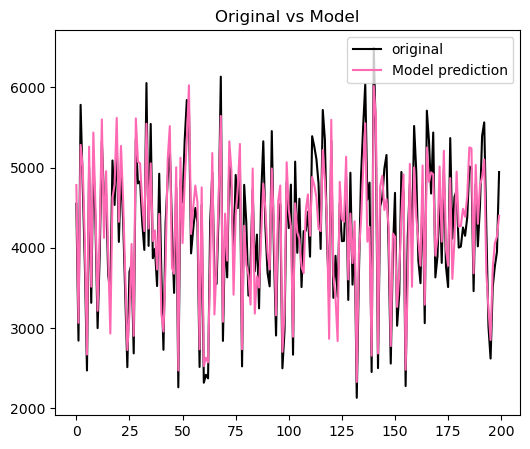

In [70]:
plt.figure(figsize=(6,5))
plt.plot(np.arange(0,200),y_test,color = "k",label = "original")
plt.plot(np.arange(0,200),model_predictions,color = "hotpink",label = "Model prediction")
plt.title("Original vs Model")
plt.legend()
plt.show()

In [71]:
r2score = r2_score(y_test,model_predictions)
print(r2score)

0.8451931910305273


In [72]:
mse = mean_squared_error(y_test,model_predictions)
print(mse)

126059.23184237469


In [73]:
mae = mean_absolute_error(y_test,model_predictions)
print(mae)

330.37436517131096
